Interacting Proteins

In [ ]:
# FIX check not using gbm_mut_type

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import sys
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsDontMatter\\')
import plot_utils as p

In [2]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")


In [3]:
gbm = cptac.Gbm()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 1)


In [4]:
trans_gene = 'EGFR'
gene = 'PTEN'

In [5]:
mut_type_gbm = gbm.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = gbm.join_omics_to_mutations(
    mutations_genes = gene, omics_df_name = 'proteomics', omics_genes = trans_gene)
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
mut_type_gbm = mut_type_gbm[['Mutation']] 
merged = ip_df.join(mut_type_gbm) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
gbm_del_wt = merged[get]
gbm_del_wt['Mutation'].value_counts()
gbm_del_wt

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 72 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)


Name,EGFR_proteomics,Mutation
Patient_ID,,
C3L-00104,1.054962,Deletion
C3L-00365,2.219562,Deletion
C3L-00674,0.137329,Deletion
C3L-00677,-0.768478,Deletion
C3L-01040,-1.249435,Deletion
...,...,...
C3N-03183,0.356865,Deletion
C3N-03184,1.623039,Deletion
C3N-03186,-0.381447,Deletion


In [6]:
o = cptac.Ovarian()

In [7]:
mut_type_gbm = o.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = o.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = trans_gene)
prot_and_mutations = o.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)
prot_and_mutations = prot_and_mutations.loc[:,~prot_and_mutations.columns.duplicated()] # drop duplicated columns
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
mut_type_gbm = mut_type_gbm[['Mutation']] 
merged = ip_df.join(mut_type_gbm) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
o_del_wt = merged[get]
o_del_wt['Mutation'].value_counts()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 98 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 01OV029, 02OV015 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 99 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)


Wildtype_Tumor    46
Deletion          20
Name: Mutation, dtype: int64

In [8]:
b = cptac.Brca()

In [52]:
b_mut_type = b.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = b.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = trans_gene)
prot_and_mutations = b.reduce_multiindex(prot_and_mutations, levels_to_drop = 1)
prot_and_mutations = prot_and_mutations.loc[:,~prot_and_mutations.columns.duplicated()] # drop duplicated columns
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
b_mut_type = b_mut_type[['Mutation']] 
merged = ip_df.join(b_mut_type) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
b_del_wt = merged[get]
b_del_wt['Mutation'].value_counts()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 118 samples for the EGFR gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)


Wildtype_Tumor    80
Deletion           7
Name: Mutation, dtype: int64

In [10]:
c = cptac.Colon()

In [11]:
mut_type_gbm = c.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = c.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = trans_gene)
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
mut_type_gbm = mut_type_gbm[['Mutation']] 
merged = ip_df.join(mut_type_gbm) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
c_del_wt = merged[get]
c_del_wt['Mutation'].value_counts()
c_del_wt

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 100 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 05CO045 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 201 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05

Name,EGFR_proteomics,Mutation
Patient_ID,,
01CO001,NaN,Wildtype_Tumor
01CO005,-0.1540,Deletion
01CO006,0.0916,Wildtype_Tumor
01CO008,-0.3250,Wildtype_Tumor
01CO013,-0.5470,Wildtype_Tumor
...,...,...
21CO007,-0.0125,Wildtype_Tumor
22CO004,-0.5250,Wildtype_Tumor
22CO006,-0.1010,Wildtype_Tumor


In [45]:
h = cptac.Hnscc()

In [47]:
mut_type_gbm = h.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = h.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = trans_gene)
prot_and_mutations = prot_and_mutations[prot_and_mutations.Sample_Status == "Tumor"] # drop Normal samples
ip_df = prot_and_mutations.iloc[:,:-4] #drop mutation, location cols
h_mut_type = mut_type[['Mutation']] 
merged = ip_df.join(h_mut_type) # merge mutation col from function (includes cnv)

# Keep two values to compare
compare = ['Wildtype_Tumor','Deletion']
get = merged['Mutation'].isin(compare)
h_del_wt = merged[get]
h_del_wt['Mutation'].value_counts()
h_mut_type['Mutation'].value_counts()

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 107 samples for the EGFR gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-02617, C3N-02727 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 383)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 174 samples for the EGFR gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)


No_Mutation      88
Deletion         17
Amplification     4
Name: Mutation, dtype: int64

In [14]:
endo = cptac.Endometrial()

In [15]:
prot_and_mutations = endo.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = trans_gene, 
    mutations_filter = ['Nonsense_Mutation','Frame_Shift_Del','Frame_Shift_Ins']) 
keep = ['Nonsense_Mutation','Frame_Shift_Del','Frame_Shift_Ins','Wildtype_Tumor']
in_keep = prot_and_mutations['PTEN_Mutation'].isin(keep)
trunc_mutations = prot_and_mutations[in_keep]
print(trunc_mutations['PTEN_Mutation'].value_counts())

# Step 2 - Create binary column 
trunc_mutations['Mutation'] = np.where(
            trunc_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype_Tumor', 'Truncation')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = trunc_mutations[trunc_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
e_trunc_wt = tumors.drop(columns_to_drop, axis = 1)
e_trunc_wt = e_trunc_wt.dropna(axis=1,how='all')
e_trunc_wt['Mutation'].value_counts()
e_trunc_wt

Nonsense_Mutation    25
Frame_Shift_Del      22
Wildtype_Tumor       20
Frame_Shift_Ins       6
Name: PTEN_Mutation, dtype: int64


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 69 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 3)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Name,EGFR_proteomics,Mutation
Patient_ID,,
C3L-00006,0.383,Truncation
C3L-00032,0.410,Truncation
C3L-00098,-1.760,Wildtype_Tumor
C3L-00137,0.358,Truncation
C3L-00139,0.948,Wildtype_Tumor
...,...,...
C3N-01520,-0.173,Truncation
C3N-01521,-1.560,Wildtype_Tumor
C3N-01537,-0.597,Wildtype_Tumor


In [16]:
gbm_del_wt = gbm_del_wt.assign(cancer = 'Gbm')
b_del_wt = b_del_wt.assign(cancer = 'Brca')
o_del_wt = o_del_wt.assign(cancer = 'Ovarian')
c_del_wt = c_del_wt.assign(cancer = 'Colon')
#h_del_wt = h_del_wt.assign(cancer = 'Hnscc') # higher scale
e_trunc_wt = e_trunc_wt.assign(cancer = 'Endometrial')

In [17]:
df = gbm_del_wt.append(b_del_wt)
df = df.append(o_del_wt)
df = df.append(c_del_wt)
df = df.append(e_trunc_wt)

df

Name,EGFR_proteomics,Mutation,cancer
Patient_ID,,,
C3L-00104,1.054962,Deletion,Gbm
C3L-00365,2.219562,Deletion,Gbm
C3L-00674,0.137329,Deletion,Gbm
C3L-00677,-0.768478,Deletion,Gbm
C3L-01040,-1.249435,Deletion,Gbm
...,...,...,...
C3N-01520,-0.173000,Truncation,Endometrial
C3N-01521,-1.560000,Wildtype_Tumor,Endometrial
C3N-01537,-0.597000,Wildtype_Tumor,Endometrial


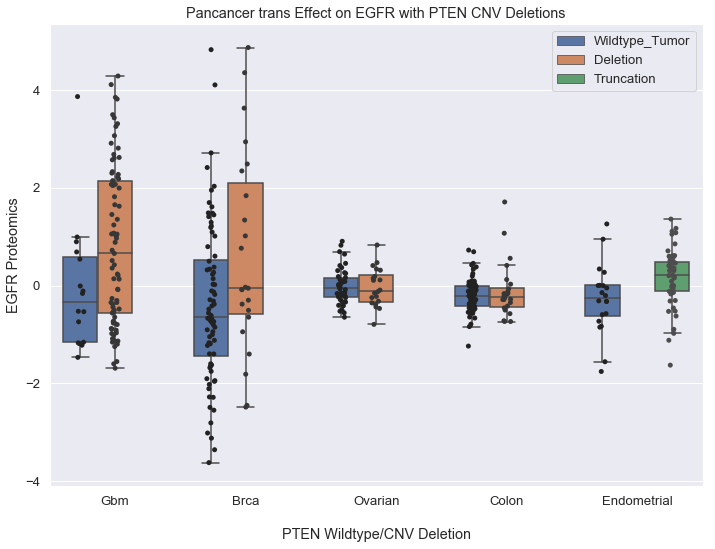

In [18]:
# pancancer cis plot
gene = 'EGFR'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='cancer', y=gene+"_proteomics", data = df, hue = 'Mutation',
                      hue_order = ["Wildtype_Tumor", "Deletion",'Truncation'], showfliers = False)    
boxplot.set_title('Pancancer trans Effect on '+ trans_gene +' with PTEN CNV Deletions')
boxplot = sns.stripplot(x='cancer', y=trans_gene+"_proteomics", data = df, jitter = True, 
                           color = ".3", hue = 'Mutation', hue_order = ["Wildtype_Tumor", "Deletion", 'Truncation'], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/CNV Deletion", ylabel = trans_gene+' Proteomics')

# format legend
handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles[0:3], labels[0:3])
'''
format_pval_annotation('*', -.3, 0, 1.3)
format_pval_annotation('*', .7, 1, 2.6)
format_pval_annotation('*', 1.7, 2, 1.6)
format_pval_annotation('ns', 2.7, 3, 1)
format_pval_annotation('*', 3.8, 4.2, 1)'''

plt.show()
plt.clf()
plt.close()

In [19]:
#fig = boxplot.get_figure()
#fig.savefig("cis_boxplot.png")

In [21]:
l = cptac.Luad()

cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 1)


In [34]:
gene = 'PTEN'
mut_type = l.get_genotype_all_vars(gene)
mut_type = mut_type.rename(columns={'PTEN':'cnv'})

prot = l.get_proteomics(tissue_type='tumor')
t_prot = prot[[trans_gene]] 
t_prot = l.reduce_multiindex(t_prot, levels_to_drop =1)

merged = t_prot.join(mut_type) # checked and there is 110 tumor samples for lung

compare = ['No_Mutation','Deletion']
get = merged['Mutation'].isin(compare)
df = merged[get]
print(del_wt['Mutation'].value_counts())
df

No_Mutation    88
Deletion       17
Name: Mutation, dtype: int64


Name,EGFR,cnv,Mutation
C3L-00001,7.5892,-0.2425,Deletion
C3L-00009,-1.8777,-0.0023,No_Mutation
C3L-00080,-1.2350,-0.6428,Deletion
C3L-00083,-2.8551,0.0224,No_Mutation
C3L-00093,-1.9872,-0.0388,No_Mutation
...,...,...,...
C3N-02729,0.6061,-0.3547,Deletion
X11LU013,5.1657,-0.2602,Deletion
X11LU016,0.6080,-0.2460,Deletion
X11LU022,1.0362,-0.0771,No_Mutation


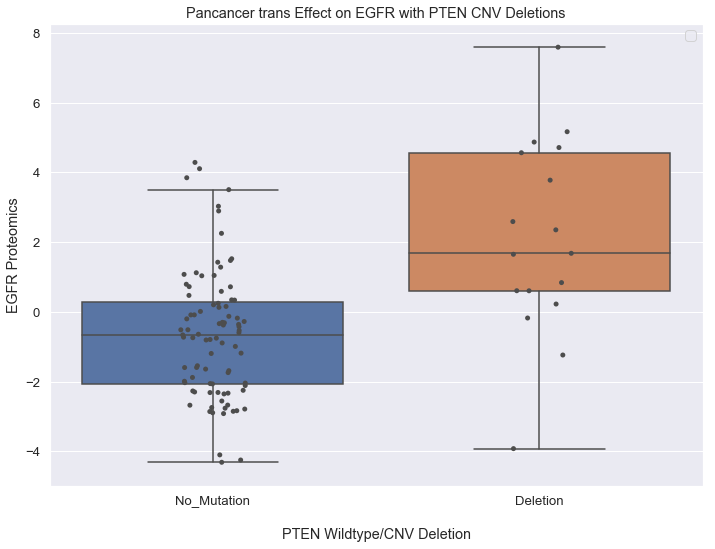

In [40]:
# pancancer cis plot
gene = 'EGFR'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=trans_gene, data = df,
                      order = ["No_Mutation", "Deletion",'Truncation'], showfliers = False)    
boxplot.set_title('Pancancer trans Effect on '+ trans_gene +' with PTEN CNV Deletions')
boxplot = sns.stripplot(x='Mutation', y=trans_gene, data = df, jitter = True, 
                           color = ".3", order = ["No_Mutation", "Deletion"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/CNV Deletion", ylabel = trans_gene+' Proteomics')

# format legend
handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles[0:3], labels[0:3])
'''
format_pval_annotation('*', -.3, 0, 1.3)
format_pval_annotation('*', .7, 1, 2.6)
format_pval_annotation('*', 1.7, 2, 1.6)
format_pval_annotation('ns', 2.7, 3, 1)
format_pval_annotation('*', 3.8, 4.2, 1)'''

plt.show()
plt.clf()
plt.close()